#Ahmad Afif Aulia Hariz
username: ahmad_afif_a._hariz_6mkN

# Data Mounting

In [60]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [61]:
import pandas as pd
import numpy as np

In [62]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tweets.csv')
df

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0
...,...,...,...,...,...
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0


#NLP Process

In [63]:
from sklearn.model_selection import train_test_split
sentence = df['text'].values
y = df['target'].values

#validation set 20% from total datasets
sentence_train, sentence_test, y_train, y_test = train_test_split(sentence, y, test_size=0.2)

In [64]:
#tokenizer function
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(sentence_train) 
tokenizer.fit_on_texts(sentence_test)
 
sekuens_train = tokenizer.texts_to_sequences(sentence_train)
sekuens_test = tokenizer.texts_to_sequences(sentence_test)
 
padded_train = pad_sequences(sekuens_train) 
padded_test = pad_sequences(sekuens_test)

In [65]:
#sequential model -> penggunaan LSTM dan embedding
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [66]:
#Call back technique 
class TestCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > 0.90 and logs.get('val_accuracy') > 0.90):
            print("\nAccuracy dan val accuracy mencapai 90%!") 
            self.model.stop_training = True 

In [67]:
num_epochs = 30
history = model.fit(padded_train, y_train, epochs=num_epochs, 
                    validation_data=(padded_test, y_test), verbose=2,
                    callbacks=[TestCallback()])

Epoch 1/30
285/285 - 4s - loss: 0.4105 - accuracy: 0.8380 - val_loss: 0.2814 - val_accuracy: 0.9019
Epoch 2/30
285/285 - 2s - loss: 0.2245 - accuracy: 0.9145 - val_loss: 0.2780 - val_accuracy: 0.9019

Accuracy dan val accuracy mencapai 90%!


In [68]:
model.evaluate(padded_test, y_test)

72/72 [==============================] - 0s 3ms/step - loss: 0.2780 - accuracy: 0.9019


[0.27799028158187866, 0.9019349217414856]

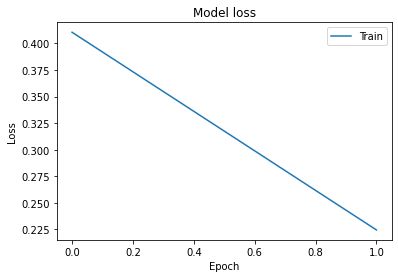

In [69]:
#Plot Loss dan Akurasi dari Trained Model
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

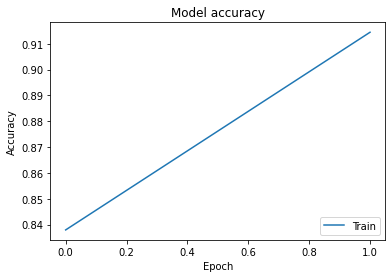

In [70]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()